<a href="https://colab.research.google.com/github/roobyyi/Data-Scientist-Practicum-Project/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Menganalisis risiko peminjam gagal membayar

Proyek Anda ialah menyiapkan laporan untuk bank bagian kredit. Anda harus mencari tahu pengaruh status perkawinan seorang nasabah dan jumlah anak terhadap probabilitas ketepatan waktu dalam melunasi pinjaman. Bank sudah memiliki beberapa data mengenai kelayakan kredit nasabah.

Laporan Anda akan dipertimbangkan pada saat membuat **penilaian kredit** untuk calon nasabah. **Penilaian kredit** digunakan untuk mengevaluasi kemampuan calon peminjam untuk melunasi pinjaman mereka.

Langkah pertama yang akan dilakukan adalah mempersiapkan data untuk siap diolah dan dianalisa, dengan cara melihat data yang tersedia apakah ada data yang hilang, duplikat, atau bahkan ada anomali data yang menyebabkan nilai yang tercantum dalam data yang disediakan menjadi tidak logis.

Setelah data telah selesai dipersiapkan, Selanjutnya adalah dengan menganalisa data, untuk mengevaluasi kemampuan calon peminjam dengan mencari hubungan tentang status perkawinan nasabah dan jumlah anak.

Disini ada dua permasalahan yang harus dihadapi.

Permasalahan pertama adalah, apakah semakin banyak jumlah anak akan menurunkan probabilitas nasabah untuk membayar pinjaman tepat waktu? Karena semakin banyak anak tentu saja semakin banyak kebutuhan yang harus dipenuhi seperti jika anak masih bayi harus ada biaya perawatan, jika anak masuk usia sekolah maka harus ada biaya edukasi (sekolah dan semacamnya)

Permasalahan kedua adalah, apakah dengan memiliki status berpasangan akan menurunkan probabilitas nasabah untuk membayar pinjaman tepat waktu? Karena ketika memiliki pasangan tentu saja ada biaya yang harus dikeluarkan untuk kebaikan hidup bersama, mungkin seperti membeli rumah yang layak untuk berkeluarga dan membeli mobil untuk transportasi bersama.

<h1>Daftar Isi<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Buka-file-data-dan-baca-informasi-umumnya." data-toc-modified-id="Buka-file-data-dan-baca-informasi-umumnya.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Buka <em>file</em> data dan baca informasi umumnya.</a></span></li><li><span><a href="#Soal-1.-Eksplorasi-Data" data-toc-modified-id="Soal-1.-Eksplorasi-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Soal 1. Eksplorasi Data</a></span></li><li><span><a href="#Transformasi-data" data-toc-modified-id="Transformasi-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transformasi data</a></span><ul class="toc-item"><li><span><a href="#Memperbaiki-nilai-yang-hilang-di-total_income" data-toc-modified-id="Memperbaiki-nilai-yang-hilang-di-total_income-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Memperbaiki nilai yang hilang di <code>total_income</code></a></span></li><li><span><a href="#Memperbaiki-nilai-di-days_employed" data-toc-modified-id="Memperbaiki-nilai-di-days_employed-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Memperbaiki nilai di <code>days_employed</code></a></span></li></ul></li><li><span><a href="#Pengkategorian-Data" data-toc-modified-id="Pengkategorian-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pengkategorian Data</a></span></li><li><span><a href="#Memeriksa-Hipotesis" data-toc-modified-id="Memeriksa-Hipotesis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Memeriksa Hipotesis</a></span></li></ul></div>

## Buka *file* data dan baca informasi umumnya. 

In [1]:
# Memuat semua perpustakaan
import pandas as pd
import seaborn as sb
import numpy as np

In [2]:
# muat data
credit_score = pd.read_csv('/content/credit_scoring_eng.csv')
credit_score.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


## Soal 1. Eksplorasi Data

**Deskripsi Data**
- *`children`* - jumlah anak dalam keluarga
- *`days_employed`* - pengalaman kerja dalam hari
- *`dob_years`* - usia klien dalam tahun
- *`education`* - pendidikan klien
- *`education_id`* - tanda pengenal pendidikan
- *`family_status`* - status perkawinan
- *`family_status_id`* - tanda pengenal status perkawinan
- *`gender`* - jenis kelamin klien
- *`income_type`* - jenis pekerjaan
- *`debt`* - apakah klien memiliki hutang pembayaran pinjaman
- *`total_income`* - pendapatan bulanan
- *`purpose`* - tujuan mendapatkan pinjaman

[Sekarang saatnya mengeksplor data kita. Anda ingin melihat berapa banyak kolom dan baris yang tersedia, lihat beberapa baris untuk memeriksa potensi masalah dengan data.]

In [ ]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
credit_score.info()
credit_score.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [ ]:
credit_score.shape

(21525, 12)

Didapatkan bahwa data memiliki 21525 baris dengan 12 kolom

In [ ]:
# mari menampilkan N baris pertama
credit_score.head(20)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


Terdapat beberapa nilai hilang dan ketidakkonsistenan dalam penulisan data, perlu diselidiki juga tentang nilai duplikat.

In [ ]:
# Mendapatkan informasi data
credit_score.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


Terdapat nilai hilang namun hanya ada dalam 2 kolom, yaitu kolom days_employed dan total_income, Namun 2 kolom tersebut memiliki jumlah nilai hilang yang sama. 

Terdapat kemungkinan yaitu, nilai NaN pada days_employed dikarenakan pengguna belum bekerja sehingga tidak memiliki penghasilan, dan berpengaruh pada total_income, sehingga total_incomenya pun NaN.

In [ ]:
# Mari kita melihat tabel yang telah difilter dengan nilai yang hilang di kolom pertama dengan data yang hilang
credit_score.loc[credit_score['days_employed'].isna()]   

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Kemungkinan tentang "nilai NaN pada days_employed dikarenakan pengguna belum bekerja sehingga tidak memiliki penghasilan, dan berpengaruh pada total_income, sehingga total_incomenya pun NaN" semakin tinggi, karena terlihat bahwa nilai NaN pada days_employed hampir selalu diiringin dengan nilai NaN pada total_income sehingga harus diselidiki menggunakan kondisi yang mana 2 kolom tersebut adalah NaN 


In [ ]:
# Mari kita menerapkan beberapa persyaratan untuk memfilter data dan melihat jumlah baris dalam tabel yang difilter.
no_income = credit_score.loc[(credit_score['days_employed'].isna()) & ((credit_score['total_income']).isna())]
no_income.shape

(2174, 12)

In [ ]:
no_income.tail(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate
21510,2,NaN,28,secondary education,1,married,0,F,employee,0,NaN,car purchase


Didapatkan ada 2174 data dengan 12 kolom dengan filter kondisi days employed yang memiliki nilai **NA** dan total_income yang memiliki nilai **NA**, sehingga disimpulkan bahwa nilai yang hilang adalah simetris (days employed **NA** membawa nilai total income yang **NA** juga)

In [ ]:
nan_ratio = (len(no_income) / len(credit_score))
print(f'{nan_ratio:.2%}')

10.10%


Kesimpulan menengah


Setelah difilter untuk kondisi total_income dan days_employed yang sama sama memiliki nilai NaN, terlihat bahwa jumlah data yang tersaji sebanyak 2174, sama dengan total NaN pada fungsi info() dan shape, sehingga disimpulkan bahwa nilai NaN pada days_employed selalu berdampingan dengan nilai NaN pada total_income yang mana mengacu pada orang yang bekerja tidak mendapat penghasilan

Persentase nilai hilang terhadap keseluruhan data adalah 10%! tentu ini merupakan nilai yang tidak bisa diabaikan

Untuk mengetahui total_income lebih jauh maka perlu dilihat umur dari peminjam, pendidikan, dan yang paling utama adalah pekerjaan, karena pekerjaan merupakan sumber dari income

In [ ]:
# Mari kita memeriksa klien yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang

no_income['income_type'].value_counts(normalize=True)



employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

Kebanyakan yang memiliki total_income NA adalah seorang pegawai

In [ ]:
# Memeriksa distribusi
print(credit_score['income_type'].value_counts(normalize=True))
print(credit_score['income_type'].value_counts())

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
entrepreneur                   0.000093
unemployed                     0.000093
paternity / maternity leave    0.000046
student                        0.000046
Name: income_type, dtype: float64
employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
entrepreneur                       2
unemployed                         2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64


Kemungkinan penyebab hilangnya nilai dalam data

1. Sama seperti dalam data yang memiliki nilai NaN untuk total_income, kebanyakan dari nasabah adalah seorang pegawai

2. Sepertinya, orang yang tidak memiliki pekerjaan berbohong tentang pekerjaannya, sehingga mengisi acak pekerjaan yang ada untuk mendapatkan pinjaman, karena memiliki pekerjaan lebih dipercaya dan memiliki kemungkinan untuk membayar tepat waktu lebih tinggi dibanding yang tidak memiliki pekerjaan, karena setelah dilihat pada data keseluruhan, orang yang "unemployed" hanya 2 orang. Tapi tidak menutup kemungkinan memang hanya 2 orang, jadi untuk saat ini kita ambil dulu data yang ada dan menyelidiki lebih lanjut di tahap berikutnya



In [ ]:
# Memeriksa distribusi di seluruh dataset
credit_score['education'].value_counts()


secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

<div class="alert alert-block alert-info">

Siap laksanakan

Karena ada beberapa yang memiliki income type yang unik (memiliki jumlah dibawah 3), maka dilakukan pengecekan mengenai data tersebut

In [ ]:
uncert_income = ['student','paternity / maternity leave','unemployed','entrepreneur']
uncert_income_list = credit_score.loc[credit_score['income_type'].isin(uncert_income)]
uncert_income_list

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3133,1,337524.466835,31,secondary education,1,married,0,M,unemployed,1,9593.119,buying property for renting out
5936,0,NaN,58,bachelor's degree,0,married,0,M,entrepreneur,0,NaN,buy residential real estate
9410,0,-578.751554,22,bachelor's degree,0,unmarried,4,M,student,0,15712.260,construction of own property
14798,0,395302.838654,45,Bachelor's Degree,0,civil partnership,1,F,unemployed,0,32435.602,housing renovation
18697,0,-520.848083,27,bachelor's degree,0,civil partnership,1,F,entrepreneur,0,79866.103,having a wedding
20845,2,-3296.759962,39,SECONDARY EDUCATION,1,married,0,F,paternity / maternity leave,1,8612.661,car


Sepertinya dengan ini masih belum bisa mendapatkan pola dengan kolom yang memungkinkan mempengaruhi debt dari income type yang disebutkan diatas

Kesimpulan menengah

Distribusi dataset asli dan yang telah difilter kurang lebih mirip, namun memang belum bisa menyimpulkan apa apa

Maka dari itu proses yang selanjutnya adalah menganalisa faktor lain, Jika ada pola yang ditemui maka kita dapat memperbaiki data berdasarkan pola yang ditemui


In [ ]:
# Periksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang
no_income['family_status'].value_counts()


married              1237
civil partnership     442
unmarried             288
divorced              112
widow / widower        95
Name: family_status, dtype: int64

In [ ]:
no_income['dob_years'].describe()

count    2174.000000
mean       43.632015
std        12.531481
min         0.000000
25%        34.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: dob_years, dtype: float64

Setelah dilihat dari nilai nilai statistiknya, sepertinya nilai **NaN** adalah random, standar deviasinya pun tinggi sehingga distribusinya bisa dibilang tersebar secara luas.

Kesimpulan menengah

Setelah dilakukan penelitian tentang family status dan umur, masih belum terlihat pola yang muncul yang bisa dijadikan acuan untuk mengisi nilai NaN, tapi saya masih ragu, sehingga dilakukan penganalisaan lebih lanjut

In [ ]:
# Memeriksa pola lainnya - jelaskan pola tersebut
credit_score[credit_score['days_employed'] > 0 ]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,27432.971,transactions with commercial real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,12070.399,to have a wedding
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property
21509,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions
21518,0,373995.710838,59,SECONDARY EDUCATION,1,married,0,F,retiree,0,24618.344,purchase of a car


Kesimpulan


Masih belum menemukan pola, namun memang ada beberapa kolom yang memiliki nilai yang aneh, seperti umur yang 0, dan hari bekerja yang negatif

Langkah yang selanjutnya akan dilakukan adalah:

1. Dikategorikan terlebih dahulu datanya sehingga dapat dikelompokan secara keseluruhan, seperti nilai yang memiliki maksud yang sama (purchase car, second car, dan lain lain), dan huruf kapital pada education.


2. Menyamakan dulu ejaan yang berbeda, Lalu menghapus duplikat yang ada, setelah itu mengisi nilai yang hilang berdasarkan mean atau median (berdasarkan kesenjangan nilai). Setelah itu bisa dibuat kategori data

## Transformasi data


In [ ]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
credit_score['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

In [ ]:
credit_score['education'].value_counts().sum()

21525

Sepertinya cuma ada perbedaan dalam penulisan kapital, tapi dilihat dulu duplikatnya siapa tau ada yang double input karena kesalahan pengetikan

In [ ]:
credit_score.duplicated().sum()

54

In [ ]:
# Perbaiki register jika diperlukan
credit_score['education'] = credit_score['education'].str.lower()

In [ ]:
# Memeriksa semua nilai di kolom untuk memastikan kita telah memperbaikinya
credit_score['education'].value_counts()


secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [ ]:
credit_score.duplicated().sum()

71

Ya, ternyata benar, data duplikat bertambah 17. Hal ini menunjukkan bahwa ada kemungkinan double input dari nasabah karena format ejaan yang dipakai belum sesuai sehingga nasabah melakukan input ulang data yang dikira salah format.

In [ ]:
credit_score['education'].value_counts().sum()

21525

Selanjutnya melihat anomali data pada kolom lainnya, yaitu children

In [ ]:
# Mari kita lihat distribusi nilai pada kolom `children`
credit_score['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Ternyata ada anomali data pada kolom children! 20 anak sepertinya terlalu banyak, ataukah keluarganya mau membuat klub sepakbola? sepertinya tidak hehe. Ada kemungkinan salah input yang harusnya 2 menjadi 20 karena tombol numpad 2 dan 0 sejajar vertikal, lalu anak yang berjumlah -1 sepertinya kesalahan input juga yang harusnya 1.

In [ ]:
# [perbaiki data berdasarkan keputusan Anda]
credit_score.loc[credit_score['children'] == -1 , 'children'] = 1
credit_score.loc[credit_score['children'] == 20 , 'children'] = 2


In [ ]:
# Periksa kembali kolom `children` untuk memastikan semua telah diperbaiki
credit_score['children'].value_counts()


0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Lanjut kembali menganalisa data pada kolom lain untuk melihat apakah ada anomali lainnya.

**Ada beberapa data yang memiliki nilai negatif, dan ada yang nilainya sangat tinggi**

Pertama melihat dulu data yang memiliki nilai negatif.

In [ ]:
# Temukan data yang bermasalah di `days_employed`, jika terdapat masalah, dan hitung persentasenya
jml_brs_ngtf = len(credit_score.loc[credit_score['days_employed'] < 0])
day_ratio = jml_brs_ngtf/len(credit_score['days_employed'])
print(f'Jumlah data yang memiliki nilai negatif adalah {jml_brs_ngtf} dengan persentase dari seluruh data sebesar {day_ratio:.2%}')

Jumlah data yang memiliki nilai negatif adalah 15906 dengan persentase dari seluruh data sebesar 73.90%


Data bermasalah sangat tinggi yaitu 73.44% , sepertinya memang benar ada kesalahan teknis, selanjutnya dibenarkan dengan nilai mutlak.

Ada data lagi yang bermasalah yaitu, jumlah hari bekerja yang lebih dari 300 ribu, sepertinya ada kesalahan teknis, sehingga dibenarkan dengan dibagi 100.

<AxesSubplot:xlabel='days_employed', ylabel='Count'>

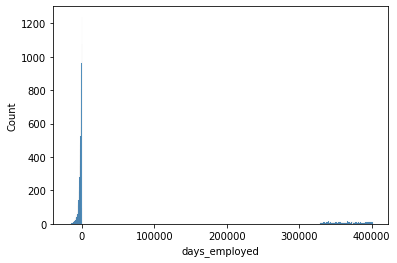

In [ ]:
sb.histplot(credit_score['days_employed'])

In [ ]:
# Atasi nilai yang bermasalah, jika ada
credit_score['days_employed'] = credit_score['days_employed'].abs()
credit_score.loc[credit_score['days_employed'] > 3e5 , 'days_employed']  = credit_score.loc[credit_score['days_employed'] > 3e5 , 'days_employed']/100

In [ ]:
# Periksa hasilnya - pastikan telah diperbaiki
credit_score.loc[credit_score['days_employed'] < 0 ]
credit_score.loc[credit_score['days_employed'] > 15000]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1539,0,15785.678893,59,bachelor's degree,0,unmarried,4,F,employee,0,19130.216,transactions with commercial real estate
3974,0,15835.725775,64,secondary education,1,civil partnership,1,F,business,0,15497.365,to have a wedding
4299,0,17615.563266,61,secondary education,1,married,0,F,business,0,19609.719,purchase of the house
4321,0,15773.061335,61,secondary education,1,civil partnership,1,F,employee,0,32938.974,wedding ceremony
5581,0,15079.216069,55,secondary education,1,married,0,F,civil servant,0,28601.820,housing transactions
7329,0,16593.472817,60,bachelor's degree,0,married,0,F,employee,0,19951.655,going to university
7731,0,15618.063786,64,secondary education,1,married,0,F,business,0,47444.057,university education
15675,0,15410.040779,65,bachelor's degree,0,married,0,F,employee,0,30208.011,buy residential real estate
16335,1,18388.949901,61,secondary education,1,married,0,F,employee,0,29788.629,real estate transactions
16825,0,16119.687737,64,secondary education,1,married,0,F,employee,0,14644.430,buy residential real estate


<AxesSubplot:xlabel='days_employed', ylabel='Count'>

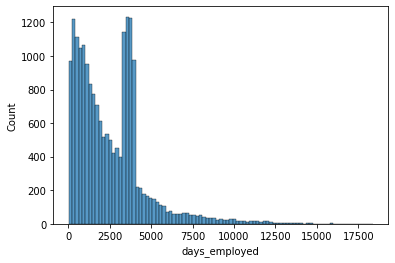

In [ ]:
sb.histplot(credit_score['days_employed'])

Data telah diperbaiki

[Sekarang mari kita melihat usia klien dan apakah terdapat masalah di sana. Sekali lagi, pikirkan tentang data apakah yang dapat menjadi suatu kejanggalan pada kolom ini, yaitu berapa usia seseorang.]


In [ ]:
credit_score['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Terdapat nilai yang aneh, yaitu umurnya 0! Untung saja tidak ada yang memiliki umur yang lebih dari 1000 tahun.

In [ ]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
underage = credit_score.loc[credit_score['dob_years'] == 0]
age_ratio = len(underage)/len(credit_score['dob_years'])
print(f'{age_ratio:.2%}')
print(f'Dengan jumlah orang yang berumur 0 adalah {len(underage)} orang')

0.47%
Dengan jumlah orang yang berumur 0 adalah 101 orang


Yap, terdapat nilai umur yang aneh, yaitu 0, namun hanya 0.47% yang merupakan data bermasalah.

Pertama dilihat dulu persebaran datanya, jika persebaran datanya "simetris" maka bisa diisi dengan mean, kalau tidak "simetris bisa menggunakan median.


count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

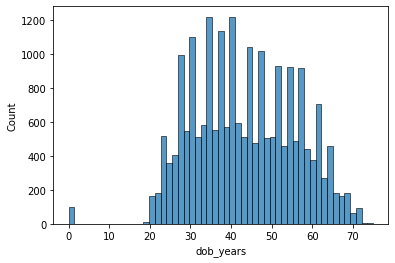

In [ ]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah

graf_age = sb.histplot(credit_score['dob_years'])
graf_age
credit_score['dob_years'].describe()

**Karena persebaran datanya normal, maka perbaikan data menggunakan mean**

In [ ]:
credit_score.loc[credit_score['dob_years'] == 0 , 'dob_years'] = round(credit_score['dob_years'].mean())

<AxesSubplot:xlabel='dob_years', ylabel='Count'>

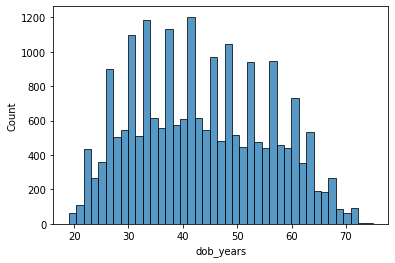

In [ ]:
# Periksa hasilnya - pastikan telah diperbaiki
sb.histplot(credit_score['dob_years'])

Selanjutnya memeriksa data pada kolom lain

In [ ]:
# Mari kita lihat nilai untuk kolom
credit_score['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

**Tidak ada nilai yang bermasalah di kolom ini**

Selanjutnya memeriksa kolom lain yaitu gender!

In [ ]:
credit_score['gender'].value_counts()# Mari kita melihat nilainya di kolom

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [ ]:
credit_score.loc[credit_score['gender'] == 'XNA']# Atasi nilai-nilai yang bermasalah, jika ada
credit_score.drop(index = 10701 , inplace=True)

Hanya ada satu data yang bermasalah, data ini memiliki gender XNA. Data ini akan di drop. Jika ada komplain maka bisa diinput ulang dengan benar. 

In [ ]:
no_income = credit_score.loc[(credit_score['days_employed'].isna()) & ((credit_score['total_income']).isna())]

In [ ]:
# Periksa hasilnya - pastikan telah diperbaiki
credit_score['gender'].value_counts()


F    14236
M     7288
Name: gender, dtype: int64

Selanjutnya adalah income type, yang mana memiliki banyak missing values

In [ ]:
credit_score['income_type'].value_counts()# Mari kita lihat nilai dalam kolom


employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
entrepreneur                       2
unemployed                         2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

Kita lihat dulu detail informasi tentang 4 income_type yang memiliki jumlah sedikit

In [ ]:
credit_score.loc[(credit_score['income_type'] == 'unemployed')| 
                 (credit_score['income_type'] == 'entrepreneur')|
                 (credit_score['income_type'] == 'paternity / maternity leave')|
                 (credit_score['income_type'] == 'student')]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3133,1,3375.244668,31,secondary education,1,married,0,M,unemployed,1,9593.119,buying property for renting out
5936,0,NaN,58,bachelor's degree,0,married,0,M,entrepreneur,0,NaN,buy residential real estate
9410,0,578.751554,22,bachelor's degree,0,unmarried,4,M,student,0,15712.260,construction of own property
14798,0,3953.028387,45,bachelor's degree,0,civil partnership,1,F,unemployed,0,32435.602,housing renovation
18697,0,520.848083,27,bachelor's degree,0,civil partnership,1,F,entrepreneur,0,79866.103,having a wedding
20845,2,3296.759962,39,secondary education,1,married,0,F,paternity / maternity leave,1,8612.661,car


Untuk entrepreneur sebenarnya bisa disatu kategorikan dengan business, student bisa saja memiliki kerja sampingan karena memiliki umur yang cukup untuk part-time, tapi juga bisa berpenghasilan dengan menjalankan bisnis, jadi karena kategori yang masih membingungkan kita masukkan dulu kedalam unemployed, jika nanti ada ada komplain bisa di input ulang secara jelas karena student bukanlah termasuk income_type, kecuali mendapatkan beasiswa, sedangkan paternity leave masuk ke employee karena sebenarnya mereka bekerja tapi sedang cuti.

In [ ]:
# Atasi nilai yang bermasalah, jika ada
credit_score.loc[credit_score['income_type'] == 'student' , 'income_type'] = 'unemployed'
credit_score.loc[credit_score['income_type'] == 'entrepreneur' , 'income_type'] = 'business'
credit_score.loc[credit_score['income_type'] == 'paternity / maternity leave' , 'income_type'] = 'employee'

In [ ]:
# Periksa hasilnya - pastikan telah diperbaiki
credit_score['income_type'].value_counts()


employee         11120
business          5086
retiree           3856
civil servant     1459
unemployed           3
Name: income_type, dtype: int64

Selanjutnya memeriksa data duplikat yang ada

In [ ]:
print(f'Data duplikat = {credit_score.duplicated().sum()}')

Data duplikat = 71


In [ ]:
credit_score.loc[credit_score.duplicated()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
4182,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
21032,0,NaN,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated
21132,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation
21281,1,NaN,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate


In [ ]:
# Atasi duplikat, jika ada
credit_score = credit_score.drop_duplicates().reset_index(drop=True)

In [ ]:
# Terakhir periksa apakah kita memiliki duplikat
credit_score.duplicated().sum()

0

Sudah tidak ada duplikat lagi.

In [ ]:
# Periksa ukuran dataset yang sekarang Anda miliki setelah manipulasi pertama yang Anda lakukan
credit_score.shape

(21453, 12)

Sekarang total data menjadi 21453.


Perubahan yang telah dilakukan adalah, menghilangkan gender XNA, merubah umur menggunakan mean, merubah waktu kerja dengan nilai mutlak dan membagi dengan 100 jika lebih dari 300ribu, menghilangkan duplikat, dan sedikit merubah income_type untuk disesuaikan dengan yang sudah ada

Persentasenya adalah :

In [ ]:
unmodified_credit_score = pd.read_csv('/datasets/credit_scoring_eng.csv')
set_ratio = len(credit_score['purpose'])/len(unmodified_credit_score['purpose'])
print(f'{1-set_ratio:.2%}')

0.33%


0.33%, sebanyak 0.33% data telah dihapus. Dari sini dilihat bahwa data yang dihapus hanya mempengaruhi sedikit ke dataset awal, dan untuk persentase data data lain seperti income_type, days_employed bisa dilihat diatas.

# Bekerja dengan nilai yang hilang

In [ ]:
# Temukan dictionary
education_dict = dict(zip(credit_score['education_id'], credit_score['education']))
family_dict = dict(zip(credit_score['family_status_id'], credit_score['family_status']))

Dictionary yang digunakan adalah education_id dan family_status, karena merupakan tipe data kategorik nominal, sebenarnya gender bisa masuk juga tapi karena cuma 2, lebih baik tidak usah menggunakan dictionary.

Ada juga debt yang mana bisa digunakan dictionary, karena nilainya 0 dan 1 mungkin untuk beberapa orang lebih baik menggunakan kata kata secara langsung dibanding true false.

### Memperbaiki nilai yang hilang di `total_income`

Langkah yang akan dilakukan sekarang adalah mengelompokkan usia, pengelompokkan ini saya ambil berdasarkan referensi dari BAPPENAS.

In [ ]:
# Mari menulis fungsi untuk menghitung kategori usia
def age_group(age):
    if 15 <= age <= 24:
        return '15 sampai 24 tahun'
    elif 25 <= age <= 34:
        return '25 sampai 34 tahun'
    elif 35 <= age <= 44:
        return '35 sampai 44 tahun'
    elif 45 <= age <= 54:
        return '45 sampai 54 tahun'
    elif 55 <= age <= 64:
        return '55 sampai 64 tahun'
    elif age > 64:
        return 'diatas 64 tahun'
    return 'dibawah 15 tahun'

In [ ]:
# Membuat kolom baru berdasarkan fungsi
credit_score['age_group'] = credit_score['dob_years'].agg(func = age_group)


In [ ]:
# Memeriksa bagaimana nilai di dalam kolom baru
credit_score.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,35 sampai 44 tahun
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35 sampai 44 tahun
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,25 sampai 34 tahun
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,25 sampai 34 tahun
4,0,3402.660720,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,45 sampai 54 tahun
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,25 sampai 34 tahun
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,35 sampai 44 tahun
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,45 sampai 54 tahun
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,35 sampai 44 tahun
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,35 sampai 44 tahun


Ya, faktor yang memungkinkan berpengaruh pada income adalah usia, dan bisa jadi education juga. Karena semakin tua bisa saja semakin memiliki pengalaman dan gaji nya pun akan lebih besar dibanding yang lebih muda.

In [ ]:
# Membuat tabel tanpa nilai yang hilang dan menampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
nonan = credit_score.dropna()
nonan.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,35 sampai 44 tahun
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,35 sampai 44 tahun
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,25 sampai 34 tahun
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,25 sampai 34 tahun
4,0,3402.660720,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,45 sampai 54 tahun


In [ ]:
pd.pivot_table(data = nonan, index=['age_group','income_type'], values=['total_income'], aggfunc=['mean','median'])

mean       median
                                  total_income total_income
age_group          income_type                             
15 sampai 24 tahun business       25446.057616   22189.0780
                   civil servant  23548.822930   21361.7300
                   employee       21288.654010   19670.1040
                   retiree        14298.976000   14298.9760
                   unemployed     15712.260000   15712.2600
25 sampai 34 tahun business       31270.520395   27221.1265
                   civil servant  27026.159686   24436.2400
                   employee       25621.575071   22722.2705
                   retiree        19271.650143   15378.5635
                   unemployed      9593.119000    9593.1190
35 sampai 44 tahun business       33941.958892   28500.6780
                   civil servant  27775.137929   23683.4620
                   employee       26470.476944   23226.3360
                   retiree        23089.127633   19831.6330
45 sampai 54 tahun business       33433.368529   28648.3635
                   civil servant  27896.865931   23857.9620
                   employee       25610.932268   22573.3530
                   retiree        23115.773065   19904.2120
                   unemployed     32435.602000   32435.6020
55 sampai 64 tahun business       31748.808276   27706.7690
                   civil servant  26707.725664   23333.3000
                   employee       27104.667636   23361.5090
                   retiree        22101.568683   19411.7010
diatas 64 tahun    business       31668.009026   26948.7450
                   civil servant  26921.808294   26089.6870
                   employee       26139.495246   24660.9010
                   retiree        20448.866997   17645.5060

Lalu kita lihat, apakah ada faktor dari pendidikan yang berpengaruh?

In [ ]:
education_dict

{0: "bachelor's degree",
 1: 'secondary education',
 2: 'some college',
 3: 'primary education',
 4: 'graduate degree'}

In [ ]:
pd.pivot_table(data = nonan, index=('age_group','education'), values = 'total_income', aggfunc=['mean','median'])

mean       median
                                        total_income total_income
age_group          education                                     
15 sampai 24 tahun bachelor's degree    25445.309825   22725.1860
                   primary education    24467.972400   25488.9160
                   secondary education  21570.635600   19386.2600
                   some college         23076.644984   21228.0410
25 sampai 34 tahun bachelor's degree    31796.863444   27721.4470
                   primary education    23916.283933   20159.1860
                   secondary education  24769.236448   22257.4440
                   some college         28877.778124   25618.4640
35 sampai 44 tahun bachelor's degree    35490.599044   29238.3795
                   graduate degree      18187.301500   18187.3015
                   primary education    21853.473122   19903.5950
                   secondary education  26127.494817   23032.1150
                   some college         34236.099793   30646.5500
45 sampai 54 tahun bachelor's degree    35603.417458   29991.7310
                   graduate degree      31771.321000   31771.3210
                   primary education    23929.409054   21215.4590
                   secondary education  25110.211417   22210.6180
                   some college         29197.518200   27164.9405
55 sampai 64 tahun bachelor's degree    30911.144494   26185.4890
                   graduate degree      41906.912500   41906.9125
                   primary education    18574.168824   17657.4995
                   secondary education  23251.566743   20376.3440
                   some college         30659.234730   25469.2650
diatas 64 tahun    bachelor's degree    28177.463470   23353.5110
                   graduate degree      15800.399000   15800.3990
                   primary education    17332.906000   15354.3830
                   secondary education  20273.532997   17943.5555
                   some college         26241.578462   27938.4350

**Selanjutnya coba lihat pengaruh days_employed pada total_income**

<AxesSubplot:xlabel='days_employed', ylabel='total_income'>

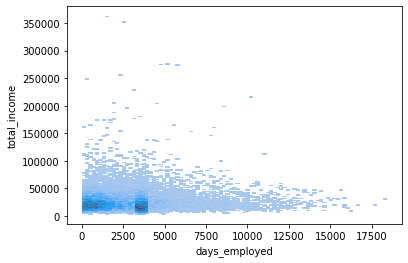

In [ ]:
sb.histplot(data = nonan, x = 'days_employed', y = 'total_income')

Ternyata lama bekerja tidak terlalu berpengaruh, karena ada yang semakin lama bekerja tapi tetap memiliki pendapatan yang kurang dibanding yang baru bekerja.



Setelah menganalisa, total_income yang hilang akan diisi dengan nilai kategori pendidikan berdasarkan mediannya, karena ada nilai total_income yang sangat jauh yang membuat distribusi persebarannya tidak simetris, contohnya untuk nilai dengan kateogori bachelor seperti dibawah ini.

Pendidikan dipilih karena jika dilihat dari mean dan median, semakin tinggi pendidikan, nilai mean dan mediannya selalu naik

[Text(0.5, 1.0, "Bachelor's Income")]

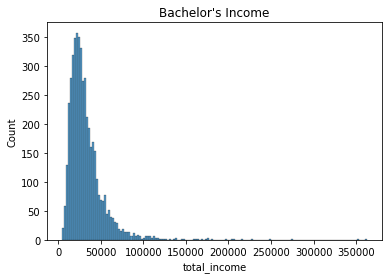

In [ ]:
z = nonan.loc[nonan['education_id'] == 0]
sb.histplot(z['total_income']).set(title="Bachelor's Income")

In [ ]:
pd.pivot_table(data=nonan, index=('age_group','education','income_type'), values='total_income', aggfunc=['mean','median'])

mean  \
                                                      total_income   
age_group          education           income_type                   
15 sampai 24 tahun bachelor's degree   business       28125.568908   
                                       civil servant  29873.948667   
                                       employee       23316.752115   
                                       unemployed     15712.260000   
                   primary education   business       27119.024000   
...                                                            ...   
diatas 64 tahun    secondary education employee       24322.353605   
                                       retiree        19402.919609   
                   some college        business       20094.359000   
                                       employee       33054.754750   
                                       retiree        23603.392750   

                                                           median  
                                                     total_income  
age_group          education           income_type                 
15 sampai 24 tahun bachelor's degree   business        24214.3790  
                                       civil servant   24617.5440  
                                       employee        21535.1395  
                                       unemployed      15712.2600  
                   primary education   business        27119.0240  
...                                                           ...  
diatas 64 tahun    secondary education employee        23550.5120  
                                       retiree         17342.4705  
                   some college        business        20094.3590  
                                       employee        32844.1030  
                                       retiree         19789.9350  

[94 rows x 2 columns]

In [ ]:
no_income.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21415,0,NaN,54,secondary education,1,married,0,F,retiree,0,NaN,housing transactions
21423,0,NaN,63,secondary education,1,married,0,M,retiree,0,NaN,purchase of a car
21426,0,NaN,49,secondary education,1,married,0,F,employee,1,NaN,property
21432,1,NaN,38,some college,2,unmarried,4,F,employee,0,NaN,housing transactions
21463,1,NaN,35,bachelor's degree,0,civil partnership,1,M,employee,0,NaN,having a wedding
21489,2,NaN,47,secondary education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,bachelor's degree,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate
21510,2,NaN,28,secondary education,1,married,0,F,employee,0,NaN,car purchase


Dari data persebaran yang telah dilihat, terlihat bahwa kesenjangan nilai total income sangat jauh, ada yang sangat tinggi sehingga akan membuat nilai mean pun meningkat, yang mana mengakibatkan nilai mean dan median memiliki selisih yang jauh dan itu berarti data tidak simetris sehingga untuk mengisi nilai yang kosong akan lebih baik jika menggunakan median.

In [ ]:
median_income = pd.pivot_table(data=nonan, index=('age_group','education','income_type'), values='total_income', aggfunc='median')

Sel diatas adalah fungsi untuk mendapatkan data median dari masing masing kelompok yang akan dijadikan referensi dalam penggantian data di langkah selanjutnya.

In [ ]:
def medi_inc(f1,f2,f3):
    masoook = median_income['total_income'].loc[(f1,f2,f3)]
    return masoook

In [ ]:
credit_score['total_income'].fillna(value='', inplace = True)
credit_score.loc[credit_score['total_income']=='', 'total_income'] = credit_score.apply(lambda x: medi_inc(x.age_group,
                                                                                            x.education,
                                                                                            x.income_type),
                                                                         axis = 1)

<AxesSubplot:xlabel='total_income', ylabel='Count'>

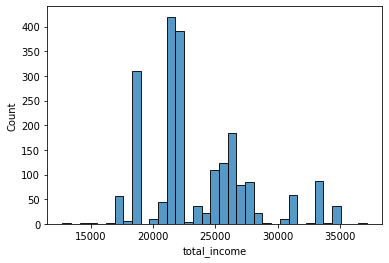

In [ ]:
lll = credit_score.loc[credit_score['days_employed'].isna()]
sb.histplot(lll['total_income'])

**Pengecekan pengisian nilai yang hilang dengan 3 factor dengan acuan days_employed(karena nilainya masih NA)
Terlihat sudah terisi sesuai dengan education, umur, dan pekerjaannya**

In [ ]:
credit_score.isna().sum()

children               0
days_employed       2103
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
age_group              0
dtype: int64

<AxesSubplot:xlabel='total_income', ylabel='Count'>

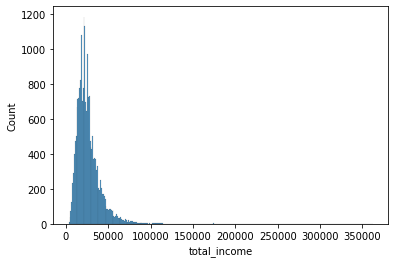

In [ ]:
# Terapkan fungsi ke setiap baris
sb.histplot(credit_score['total_income'])

In [ ]:
# Mengganti nilai yang hilang jika terdapat kesalahan
credit_score.loc[credit_score['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group


Periksa kembali kolom lain.

In [ ]:
# Memeriksa jumlah entri di kolom
credit_score.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  object 
 11  purpose           21453 non-null  object 
 12  age_group         21453 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 2.1+ MB


Total income sudah diperbaiki sesuai dengan median dari total_income berdasarkan pendidikan,umur, dan pekerjaan.

###  Memperbaiki nilai di `days_employed`

In [ ]:
pd.pivot_table(data = nonan, index=('age_group'), values = 'days_employed', aggfunc=['mean','median'])

,mean,median
,days_employed,days_employed
age_group,,
15 sampai 24 tahun,855.282082,744.279198
25 sampai 34 tahun,1593.560024,1292.221018
35 sampai 44 tahun,2428.189511,1856.018903
45 sampai 54 tahun,3095.868649,2637.784944
55 sampai 64 tahun,3611.686214,3580.804816
diatas 64 tahun,3708.694906,3646.615594


In [ ]:
pd.pivot_table(data = nonan, index=('income_type'), values = 'days_employed', aggfunc=['mean','median'])

,mean,median
,days_employed,days_employed
income_type,,
business,2111.122879,1545.284206
civil servant,3399.896902,2689.368353
employee,2326.596097,1574.429209
retiree,3650.034912,3652.133063
unemployed,2635.674869,3375.244668


In [ ]:
credit_score['income_type'].value_counts() #cek semua jenis pekerjaan

employee         11085
business          5079
retiree           3829
civil servant     1457
unemployed           3
Name: income_type, dtype: int64

<AxesSubplot:xlabel='days_employed', ylabel='Count'>

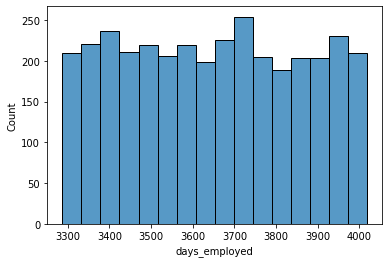

In [ ]:
z = nonan.loc[nonan['income_type'] == 'retiree'] ##Cek semua plot berdasar income type
sb.histplot(data = z, x='days_employed')

In [ ]:
credit_score['age_group'].value_counts()

35 sampai 44 tahun    5841
25 sampai 34 tahun    5092
45 sampai 54 tahun    4867
55 sampai 64 tahun    3884
diatas 64 tahun        895
15 sampai 24 tahun     874
Name: age_group, dtype: int64

<AxesSubplot:xlabel='days_employed', ylabel='Count'>

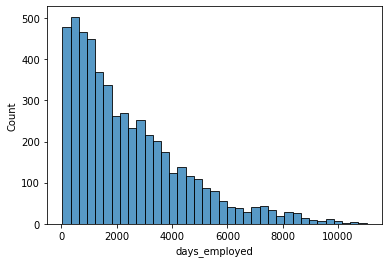

In [ ]:
z = nonan.loc[nonan['age_group'] == '35 sampai 44 tahun'] ##Cek distribusi berdasar kategori umur
sb.histplot(data = z, x='days_employed')

Hampir semua data days_employed memiliki distribusi data yang tidak simetreis (skewed) sehingga lebih baik menggunakan median untuk mengisi nilai yang hilangnya.

Parameter yang dijadikan acuan adalah income_type, karena dari jenis pekerjaan, bisa dilihat lama bekerjanya, sebenarnya gender memiliki sedikit pengaruh, tapi karena tidak ingin melakukan gender stereotyping, maka umur yang dijadikan acuan, umur juga sebenarnya ada sedikit pengaruh, namun yang terlihat berpola adalah dari income type, dimana income type retiree sangat jelas terlihat berpola.

In [ ]:
pd.pivot_table(data = nonan, index=('age_group','income_type'), values = 'days_employed', aggfunc=['mean','median'])

mean        median
                                 days_employed days_employed
age_group          income_type                              
15 sampai 24 tahun business         787.090016    691.676752
                   civil servant    975.347977    922.372533
                   employee         873.864193    769.758975
                   retiree         3347.642598   3347.642598
                   unemployed       578.751554    578.751554
25 sampai 34 tahun business        1480.207464   1168.374165
                   civil servant   2003.871330   1864.901726
                   employee        1582.711337   1274.074208
                   retiree         3641.175967   3664.521039
                   unemployed      3375.244668   3375.244668
35 sampai 44 tahun business        2136.981888   1693.069607
                   civil servant   3603.394996   3227.147653
                   employee        2382.055884   1738.546227
                   retiree         3638.218932   3605.877431
45 sampai 54 tahun business        2755.077797   2045.456606
                   civil servant   4355.234069   3527.162375
                   employee        2944.355689   2063.223473
                   retiree         3639.315406   3627.239331
                   unemployed      3953.028387   3953.028387
55 sampai 64 tahun business        3126.150196   2147.212460
                   civil servant   4985.852452   3998.694317
                   employee        3533.590053   2382.496567
                   retiree         3650.805152   3655.824417
diatas 64 tahun    business        3292.768472   1928.123732
                   civil servant   4377.924812   3339.663548
                   employee        4366.938943   3240.640456
                   retiree         3658.325913   3659.344327

Dari data diatas, terlihat bahwa mean dan mediannya memiliki kesenjangan nilai yang lumayan besar untuk beberapa kategori, sehingga yang dipakai untuk mengisi nilai NaN adalah median lagi.

In [ ]:
days_median = pd.pivot_table(data = nonan, index=('age_group','income_type'), values = 'days_employed', aggfunc='median')

In [ ]:
days_median

days_employed
age_group          income_type                 
15 sampai 24 tahun business          691.676752
                   civil servant     922.372533
                   employee          769.758975
                   retiree          3347.642598
                   unemployed        578.751554
25 sampai 34 tahun business         1168.374165
                   civil servant    1864.901726
                   employee         1274.074208
                   retiree          3664.521039
                   unemployed       3375.244668
35 sampai 44 tahun business         1693.069607
                   civil servant    3227.147653
                   employee         1738.546227
                   retiree          3605.877431
45 sampai 54 tahun business         2045.456606
                   civil servant    3527.162375
                   employee         2063.223473
                   retiree          3627.239331
                   unemployed       3953.028387
55 sampai 64 tahun business         2147.212460
                   civil servant    3998.694317
                   employee         2382.496567
                   retiree          3655.824417
diatas 64 tahun    business         1928.123732
                   civil servant    3339.663548
                   employee         3240.640456
                   retiree          3659.344327

**Membuat fungsi untuk mengisi nilai NaN**

In [ ]:
def medi_days(f1,f2):
    masoook = days_median['days_employed'].loc[(f1,f2)]
    return masoook

In [ ]:
medi_days('diatas 64 tahun','retiree')

3659.344326956698

In [ ]:
credit_score['days_employed'].fillna(value='', inplace = True)
credit_score.loc[credit_score['days_employed']=='', 'days_employed'] = credit_score.apply(lambda x: medi_days(x.age_group,
                                                                                            x.income_type),
                                                                         axis = 1)

<AxesSubplot:xlabel='days_employed', ylabel='Count'>

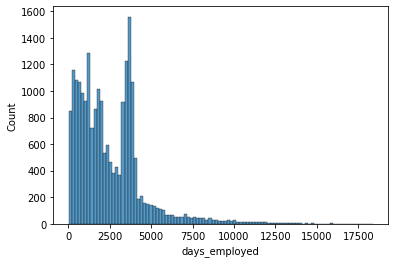

In [ ]:
# Periksa bahwa fungsi bekerja
sb.histplot(credit_score['days_employed'])


In [ ]:
# Mengganti nilai yang hilang
credit_score.loc[credit_score['days_employed'].isna()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group


In [ ]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21453 non-null  int64 
 1   days_employed     21453 non-null  object
 2   dob_years         21453 non-null  int64 
 3   education         21453 non-null  object
 4   education_id      21453 non-null  int64 
 5   family_status     21453 non-null  object
 6   family_status_id  21453 non-null  int64 
 7   gender            21453 non-null  object
 8   income_type       21453 non-null  object
 9   debt              21453 non-null  int64 
 10  total_income      21453 non-null  object
 11  purpose           21453 non-null  object
 12  age_group         21453 non-null  object
dtypes: int64(5), object(8)
memory usage: 2.1+ MB


In [ ]:
credit_score.loc[credit_score['days_employed'] ==credit_score['days_employed'].max()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
16296,1,18388.949901,61,secondary education,1,married,0,F,employee,0,29788.629,real estate transactions,55 sampai 64 tahun


Terlihat sedikit aneh, usia 61 tahun bekerja selama 50 tahun lebih, tapi masih masuk akal sih, hanya saja umur saat awal bekerja adalah 11 tahun agak kasihan, tapi siapa tau memiliki bisnis sampingan.

Terlihat tidak ada data yang null lagi sekarang.

## Pengkategorian Data

Selanjutnya adalah pengkategorian data tentang tujuan yang dilakukan dalam peminjaman.

In [ ]:
# Tampilkan nilai data yang Anda pilih untuk pengkategorian
credit_score['purpose'].describe()

count                21453
unique                  38
top       wedding ceremony
freq                   791
Name: purpose, dtype: object

[Let's check unique values]

In [ ]:
# Periksa nilai unik
credit_score['purpose'].value_counts()

wedding ceremony                            791
having a wedding                            768
to have a wedding                           765
real estate transactions                    675
buy commercial real estate                  661
housing transactions                        652
buying property for renting out             651
transactions with commercial real estate    650
purchase of the house                       646
housing                                     646
purchase of the house for my family         638
construction of own property                635
property                                    633
transactions with my real estate            627
building a real estate                      624
buy real estate                             620
purchase of my own house                    620
building a property                         619
housing renovation                          607
buy residential real estate                 606
buying my own car                       


**Dilihat dari tujuan meminjam, terlihat secara umum hanya ada 4 kategori, yaitu membeli mobil, membeli rumah, menikah, dan biaya edukasi**



In [ ]:
# Mari kita menulis fungsi untuk mengkategorikan data berdasarkan topik umum
#purpose_category = ['kendaraan','rumah','pernikahan','edukasi']

def kategori(tuju):
    if 'car' in tuju:
        return 'kendaraan'
    elif 'wedd' in tuju:
        return 'menikah'
    elif ('edu') in tuju:
        return 'edukasi'
    elif ('univ') in tuju:
        return 'edukasi'
    elif ('hous') in tuju:
        return 'rumah'
    elif ('estat') in tuju:
        return 'rumah'
    elif ('property') in tuju:
        return 'rumah'

In [ ]:
# Buat kolom dengan kategori dan hitung nilainya
credit_score['purpose_category'] = credit_score['purpose'].agg(kategori)
credit_score['purpose_category'].value_counts().sum()

21453

In [ ]:
credit_score['purpose_category'].value_counts()

rumah        10810
kendaraan     4306
edukasi       4013
menikah       2324
Name: purpose_category, dtype: int64

In [ ]:
# Lihat melalui semua data numerik di kolom yang Anda pilih untuk pengkategorian
pd.pivot_table(credit_score, index = ['purpose_category','age_group'],values = 'debt', aggfunc = sum) #

debt
purpose_category age_group               
edukasi          15 sampai 24 tahun    15
                 25 sampai 34 tahun   130
                 35 sampai 44 tahun    91
                 45 sampai 54 tahun    75
                 55 sampai 64 tahun    50
                 diatas 64 tahun        9
kendaraan        15 sampai 24 tahun    20
                 25 sampai 34 tahun   130
                 35 sampai 44 tahun   123
                 45 sampai 54 tahun    69
                 55 sampai 64 tahun    51
                 diatas 64 tahun       10
menikah          15 sampai 24 tahun    13
                 25 sampai 34 tahun    50
                 35 sampai 44 tahun    54
                 45 sampai 54 tahun    38
                 55 sampai 64 tahun    25
                 diatas 64 tahun        6
rumah            15 sampai 24 tahun    40
                 25 sampai 34 tahun   253
                 35 sampai 44 tahun   214
                 45 sampai 54 tahun   163
                 55 sampai 64 tahun    88
                 diatas 64 tahun       24

In [ ]:
credit_score['age_group'].value_counts()

35 sampai 44 tahun    5841
25 sampai 34 tahun    5092
45 sampai 54 tahun    4867
55 sampai 64 tahun    3884
diatas 64 tahun        895
15 sampai 24 tahun     874
Name: age_group, dtype: int64

Terlihat bahwa yang paling banyak meminjam adalah golongan yang berusia 35 sampai 44 tahun
Untuk kategori peminjaman, kebanyakan yaitu untuk rumah. Rumah memang adalah kebutuhan primer, jadi alasan masuk akal ketika yang paling banyak meminjam adalah untuk membeli/menyewa bangunan/rumah




Rentang jumlah income akan digunakan untuk pengelompokan selanjutnya, dilihat distribusi kebutuhan peminjam untuk apa berdasar incomenya, misalnya untuk yang incomenya lebih rendah apakah akan lebih memilih meminjam untuk edukasi atau rumah.

In [ ]:
# Membuat fungsi untuk pengkategorian menjadi kelompok numerik yang berbeda berdasarkan rentang
q = credit_score['total_income'].mean()
def gaji(income):
    if income < q:
        return 'dibawah rata rata'
    elif income >= q:
        return 'diatas rata rata'

In [ ]:
# Membuat kolom dengan kategori
credit_score['kategori_income'] = credit_score['total_income'].agg(gaji)

In [ ]:
# Menghitung setiap nilai kategori untuk melihat pendistribusian
credit_score['kategori_income'].value_counts()

dibawah rata rata    13420
diatas rata rata      8033
Name: kategori_income, dtype: int64

Banyak sekali peminjam yang memiliki gaji dibawah rata rata.


## Memeriksa Hipotesis


**Apakah terdapat korelasi antara memiliki anak dengan membayar kembali tepat waktu?**

In [ ]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21453 non-null  int64 
 1   days_employed     21453 non-null  object
 2   dob_years         21453 non-null  int64 
 3   education         21453 non-null  object
 4   education_id      21453 non-null  int64 
 5   family_status     21453 non-null  object
 6   family_status_id  21453 non-null  int64 
 7   gender            21453 non-null  object
 8   income_type       21453 non-null  object
 9   debt              21453 non-null  int64 
 10  total_income      21453 non-null  object
 11  purpose           21453 non-null  object
 12  age_group         21453 non-null  object
 13  purpose_category  21453 non-null  object
 14  kategori_income   21453 non-null  object
dtypes: int64(5), object(10)
memory usage: 2.5+ MB


In [ ]:
# Periksa data anak dan membayar kembali dengan tepat waktu
child_debt = pd.pivot_table(credit_score, index ='children',columns = 'debt', values = 'kategori_income', aggfunc=('count'))
# Menghitung tarif otomatis berdasarkan jumlah anak
child_debt

debt,0,1
children,,
0,13027.0,1063.0
1,4410.0,445.0
2,1926.0,202.0
3,303.0,27.0
4,37.0,4.0
5,9.0,NaN


In [ ]:
child_debt.fillna(0,inplace=True)
##Fungsi Menghitung persentase gagal bayar
child_debt['percentage %'] = child_debt.apply(lambda x: (x[1]/(x[0]+x[1]))*100, axis=1)
child_debt

debt,0,1,percentage %
children,,,
0,13027.0,1063.0,7.544358
1,4410.0,445.0,9.165808
2,1926.0,202.0,9.492481
3,303.0,27.0,8.181818
4,37.0,4.0,9.756098
5,9.0,0.0,0.000000


Kesimpulan

Dari pengaruh jumlah anak dengan hutang, sepertinya tidak pengaruh, dari data yang diperoleh, semakin sedikit anak malah semakin banyak yang tidak membayar.

**Apakah terdapat korelasi antara status keluarga dengan membayar kembali tepat waktu?**

In [ ]:
# Periksa data status keluarga dan membayar kembali dengan tepat waktu
family_debt = pd.pivot_table(credit_score, index ='family_status',columns = 'debt', values = 'kategori_income', aggfunc=('count'))
family_debt['percentage %'] = family_debt.apply(lambda x: (x[1]/(x[0]+x[1]))*100, axis=1)
family_debt

# Menghitung tarif otomatis berdasarkan status keluarga



debt,0,1,percentage %
family_status,,,
civil partnership,3762,388,9.349398
divorced,1110,85,7.112971
married,11408,931,7.545182
unmarried,2536,274,9.750890
widow / widower,896,63,6.569343


**Kesimpulan**

Yang sudah berpasangan malah lebih banyak yang tidak membayar tepat waktu, ini bisa saja terjadi karena manejemen uang yang buruk karena ketika bersama pasangan maka pasti ada biaya yang diperuntukkan untuk kebahagiaan pasangan sehingga lupa bahwa membayar pinjaman adalah tanggung jawab yang besar.

**Apakah terdapat korelasi antara tingkat pendapatan dengan membayar kembali tepat waktu?**

In [ ]:
# Periksa data tingkat pendapatan dan membayar kembali dengan tepat waktu
income_debt = pd.pivot_table(credit_score, index ='kategori_income',columns = 'debt', values = 'days_employed', aggfunc=('count'))
income_debt['percentage %'] = income_debt.apply(lambda x: (x[1]/(x[0]+x[1]))*100, axis=1)
income_debt


# Menghitung tarif otomatis berdasarkan tingkat pendapatan



debt,0,1,percentage %
kategori_income,,,
diatas rata rata,7428,605,7.531433
dibawah rata rata,12284,1136,8.464978


**Kesimpulan**

Dilihat dari kategori pendapatan, yang memiliki pendapatan diatas rata rata lebih sedikit yang tidak membayar tepat waktu dibanding yang memilki pendapatan dibawah rata rata, ini mungkin terjadi karena yang memiliki pendapatan dibawah rata rata bisa saja kurang bisa mengatur keuangan dan menjadikan kebutuhan primer sebagai alasan untuk tidak membayar pinjaman.

**Bagaimana tujuan kredit memengaruhi tarif otomatis?**

In [ ]:
# Periksa persentase tarif otomatis untuk setiap tujuan kredit dan lakukan penganalisisan
purpose_debt = pd.pivot_table(credit_score, index ='purpose_category',columns = 'debt', values = 'days_employed', aggfunc=('count'))
purpose_debt['percentage %'] = purpose_debt.apply(lambda x: (x[1]/(x[0]+x[1]))*100, axis=1)
purpose_debt


debt,0,1,percentage %
purpose_category,,,
edukasi,3643,370,9.220035
kendaraan,3903,403,9.359034
menikah,2138,186,8.003442
rumah,10028,782,7.234043


**Kesimpulan**

Yang meminjam kebanyakan untuk membeli/menyewa rumah, lalu dilanjut kendaraan dan edukasi, disini kebanyakan mereka yang tidak membayar tepat waktu adalah yang meminjam dengan tujuan edukasi dan kendaraan, yang meminjam kebanyakan malah rumah tapi mereka yang meminjam untuk kebutuhan rumah kebanyakan membayar tepat waktu, sepertinya memang yang meminjam untuk rumah kebanyakan sudah mapan dan butuh bantuan dana sehingga meminjam, sedangkan edukasi dan kendaraan bisa dibilang orang orang yang meminjam "kepepet" meskipun hanya beda 2% dengan yang meminjam untuk rumah.

# Kesimpulan Umum 

1. Untuk mempersiapkan data pertama harus membenarkan dulu nilai yang bermasalah seperti nilai yang hilang, duplikat,dll, untuk mempermudah, bisa juga dibuatkan kategori datanya sehingga lebih mudah dalam menganalisa lebih lanjut.

2. Untuk mengisi nilai yang hilang ada beberapa cara namun untuk kali ini hampir semua menggunakan median, hal ini dilakukan karena persebaran datanya uang kurang simetris sehingga jika menggunakan mean "bisa saja" melenceng lebih jauh.

3. Untuk analisa lebih lanjut dibutuhkan pemikiran yang logis juga untuk menganalisa data, yang mana pemikiran ini bisa dilatih seiring dengan berjalannya waktu dan mengolah data nanti.


4. Hal yang ingin ditanyakan sepertinya bingung untuk menentukan kategori nilai yang hilang, misal yang days_employed apakah harus menggunakan pekerjaan atau dari umur atau yanglain  tapi yang saya gunakan adalah sesuai dengan feeling jadi masih belum tahu kepastiannya.

5. Mungkin untuk solusi sementara yang bisa saya pikirkan adalah memperlama durasi pembayaran untuk yang memiliki tujuan membeli/menyewa rumah, dan juga yang lainnya yang sekiranya bisa dicicil, memang jahat jika dipikir pikir bila tujuan memperlama durasi berujung pada bunga yang lebih besar. Tapi begitulah peminjaman uang. Ya mungkin bisa diadakan pengurangan khusus untuk yang berkeluarga juga, memang pengurangan khusus akan berakibat ke turunnya pendapatan dari pengembalian pinjaman, tapi ya... membayar tepat waktu dengan pengurangan khusus lebih untung daripada membayar telat, atau bahkan tidak membayar sama sekali, dan untuk yang memiliki anak tidak ada potongan khusus! Karena tidak berpengaruh apapun.